# Data Science In Python 
### Ravi Gollapalli
> The objective of this task was to collect a dataset from one or more open web APIs, and use Python to prepare, analyse, and derive insights from the collected data.
> - Given the current circumstances, I was quite interested in analysing Ireland's response to the Covid-19.
> - In order to make a good analysis of the response, I decided to compare us to **Norway**, due to the fact that it has a very similar population and Human Development Index value to Ireland, making it a fair comparison
> - This analysis compared the total number of cases, total number of deaths, daily number of cases and daily number of deaths of the two countries
> - All analysis is done between the dates 15th of February 2020 to 5th of November 2020 and any points are relevant to these dates only

## Data Identification & Collection


In [1]:
#importing necessary libraries
import json
import pandas as pd
import requests 

> - I used the COVID-19 API from https://covid19api.com/ to collect data from Ireland and Norway.
> - Using the documentation from Postman : https://documenter.getpostman.com/view/10808728/SzS8rjbc, I was able to collect live data of confirmed cases and deaths from the 15th of February to the 5th of November of both countries by entering parameters into the URL given. 
> - There was no API key required to gather this data. 

In [2]:
#Created a function to gather data from the URL
def get_data(url):
    #using requests to pull the data from the URL 
    r = requests.get(url)
    data = r.json()
    return data   

In [3]:
#Created a function to write the data to a file and read file
def write_file(name, data):
    #creating a JSON file
    with open(name, 'w') as f:
        json.dump(data, f)
    #reading the file that was created
    with open(name) as s:
        data = json.load(s)
    return data

In [4]:
#URLS of the confirmed cases and deaths from Ireland and Norway
Ire1 = "https://api.covid19api.com/country/ireland/status/confirmed/live?from=2020-02-15T00:00:00Z&to=2020-11-05T00:00:00Z"
Ire2 = "https://api.covid19api.com/country/ireland/status/deaths/live?from=2020-02-15T00:00:00Z&to=2020-11-05T00:00:00Z"
Nor1 = "https://api.covid19api.com/country/norway/status/confirmed/live?from=2020-02-15T00:00:00Z&to=2020-11-05T00:00:00Z"
Nor2 = "https://api.covid19api.com/country/norway/status/deaths/live?from=2020-02-15T00:00:00Z&to=2020-11-05T00:00:00Z"

In [5]:
#gathering the data using the function
Ire_Con = get_data(Ire1)
Ire_Dea = get_data(Ire2)
Nor_Con = get_data(Nor1)
Nor_Dea = get_data(Nor2)

In [6]:
#writing the data to the files in JSON format
Ire_Confirmed = write_file("Ire_Confirmed.json", Ire_Con)
Ire_Deaths = write_file("Ire_Deaths.json", Ire_Dea)
Nor_Confirmed = write_file("Nor_Confirmed.json", Nor_Con)
Nor_Deaths = write_file("Nor_Deaths.json", Nor_Dea)

## Data Preparation
> - Loaded the files into a Pandas dataframe
> - The pre-processing steps include cleaning, filtering and engineering the data

In [7]:
#loading the Irish Confirmed (IC) cases into a pandas dataframe, setting Date as the index
IC_df = pd.DataFrame(data=Ire_Confirmed).set_index("Date")
IC_df

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status
Date,,,,,,,,,
2020-02-15T00:00:00Z,Ireland,IE,,,,53.41,-8.24,0,confirmed
2020-02-16T00:00:00Z,Ireland,IE,,,,53.41,-8.24,0,confirmed
2020-02-17T00:00:00Z,Ireland,IE,,,,53.41,-8.24,0,confirmed
2020-02-18T00:00:00Z,Ireland,IE,,,,53.41,-8.24,0,confirmed
2020-02-19T00:00:00Z,Ireland,IE,,,,53.41,-8.24,0,confirmed
...,...,...,...,...,...,...,...,...,...
2020-11-01T00:00:00Z,Ireland,IE,,,,53.41,-8.24,62002,confirmed
2020-11-02T00:00:00Z,Ireland,IE,,,,53.41,-8.24,62750,confirmed
2020-11-03T00:00:00Z,Ireland,IE,,,,53.41,-8.24,63048,confirmed


In [8]:
#filter the dataframe by deleting the columns that don't have data or aren't relevant to the analysis
cols = ["Province", "City", "CityCode", "CountryCode"]
#dropping the columns specified
IC_df = IC_df.drop(cols, axis=1)

In [9]:
#loading the Irish Death (ID) cases into a pandas dataframe, setting Date as the index
ID_df = pd.DataFrame(data=Ire_Deaths).set_index("Date")
ID_df

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status
Date,,,,,,,,,
2020-02-15T00:00:00Z,Ireland,IE,,,,53.41,-8.24,0,deaths
2020-02-16T00:00:00Z,Ireland,IE,,,,53.41,-8.24,0,deaths
2020-02-17T00:00:00Z,Ireland,IE,,,,53.41,-8.24,0,deaths
2020-02-18T00:00:00Z,Ireland,IE,,,,53.41,-8.24,0,deaths
2020-02-19T00:00:00Z,Ireland,IE,,,,53.41,-8.24,0,deaths
...,...,...,...,...,...,...,...,...,...
2020-11-01T00:00:00Z,Ireland,IE,,,,53.41,-8.24,1915,deaths
2020-11-02T00:00:00Z,Ireland,IE,,,,53.41,-8.24,1917,deaths
2020-11-03T00:00:00Z,Ireland,IE,,,,53.41,-8.24,1922,deaths


In [10]:
#dropping the columns specified previously
ID_df = ID_df.drop(cols, axis=1)

In [11]:
#loading the Norwegian Confirmed (NC) cases into a pandas dataframe, setting Date as the index
NC_df = pd.DataFrame(data=Nor_Confirmed).set_index("Date")
NC_df

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status
Date,,,,,,,,,
2020-02-15T00:00:00Z,Norway,NO,,,,60.47,8.47,0,confirmed
2020-02-16T00:00:00Z,Norway,NO,,,,60.47,8.47,0,confirmed
2020-02-17T00:00:00Z,Norway,NO,,,,60.47,8.47,0,confirmed
2020-02-18T00:00:00Z,Norway,NO,,,,60.47,8.47,0,confirmed
2020-02-19T00:00:00Z,Norway,NO,,,,60.47,8.47,0,confirmed
...,...,...,...,...,...,...,...,...,...
2020-11-01T00:00:00Z,Norway,NO,,,,60.47,8.47,20635,confirmed
2020-11-02T00:00:00Z,Norway,NO,,,,60.47,8.47,21339,confirmed
2020-11-03T00:00:00Z,Norway,NO,,,,60.47,8.47,21956,confirmed


In [12]:
#dropping the columns specified previously
NC_df = NC_df.drop(cols, axis=1)

In [13]:
#loading the Norwegian Death (ND) cases into a pandas dataframe, setting Date as the index
ND_df = pd.DataFrame(data=Nor_Deaths).set_index("Date")
ND_df

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status
Date,,,,,,,,,
2020-02-15T00:00:00Z,Norway,NO,,,,60.47,8.47,0,deaths
2020-02-16T00:00:00Z,Norway,NO,,,,60.47,8.47,0,deaths
2020-02-17T00:00:00Z,Norway,NO,,,,60.47,8.47,0,deaths
2020-02-18T00:00:00Z,Norway,NO,,,,60.47,8.47,0,deaths
2020-02-19T00:00:00Z,Norway,NO,,,,60.47,8.47,0,deaths
...,...,...,...,...,...,...,...,...,...
2020-11-01T00:00:00Z,Norway,NO,,,,60.47,8.47,282,deaths
2020-11-02T00:00:00Z,Norway,NO,,,,60.47,8.47,282,deaths
2020-11-03T00:00:00Z,Norway,NO,,,,60.47,8.47,282,deaths


In [14]:
#dropping the columns specified previously
ND_df = ND_df.drop(cols, axis=1)

In [15]:
#Integrating the Irish Data by using the merge function given by pandas 
mergeIre = pd.merge(IC_df, ID_df, left_index=True, right_index=True, how='outer')

In [16]:
#Integrating the Norwegian Data by using the merge function given by pandas 
mergeNor = pd.merge(NC_df, ND_df, left_index=True, right_index=True, how='outer')

In [17]:
#Integrating the Irish and Norwegian Data by using the merge function given by pandas 
mergeIN = pd.merge(mergeIre, mergeNor, left_index=True, right_index=True, how='outer')
mergeIN.head()

,Country_x_x,Lat_x_x,Lon_x_x,Cases_x_x,Status_x_x,Country_y_x,Lat_y_x,Lon_y_x,Cases_y_x,Status_y_x,Country_x_y,Lat_x_y,Lon_x_y,Cases_x_y,Status_x_y,Country_y_y,Lat_y_y,Lon_y_y,Cases_y_y,Status_y_y
Date,,,,,,,,,,,,,,,,,,,,
2020-02-15T00:00:00Z,Ireland,53.41,-8.24,0,confirmed,Ireland,53.41,-8.24,0,deaths,Norway,60.47,8.47,0,confirmed,Norway,60.47,8.47,0,deaths
2020-02-16T00:00:00Z,Ireland,53.41,-8.24,0,confirmed,Ireland,53.41,-8.24,0,deaths,Norway,60.47,8.47,0,confirmed,Norway,60.47,8.47,0,deaths
2020-02-17T00:00:00Z,Ireland,53.41,-8.24,0,confirmed,Ireland,53.41,-8.24,0,deaths,Norway,60.47,8.47,0,confirmed,Norway,60.47,8.47,0,deaths
2020-02-18T00:00:00Z,Ireland,53.41,-8.24,0,confirmed,Ireland,53.41,-8.24,0,deaths,Norway,60.47,8.47,0,confirmed,Norway,60.47,8.47,0,deaths
2020-02-19T00:00:00Z,Ireland,53.41,-8.24,0,confirmed,Ireland,53.41,-8.24,0,deaths,Norway,60.47,8.47,0,confirmed,Norway,60.47,8.47,0,deaths


In [18]:
#cleaning the data by renaming columns to make it more readable
mergeIN.rename(columns = {'Country_x_x':'Country1','Lat_x_x':'Lat1', 'Lon_x_x':'Lon1', 
                             'Cases_x_x':'Total_Confirmed_Ire', 'Status_x_x':'Status_Confirmed_Ire', 'Cases_y_x':'Total_Death_Ire', 
                             'Status_y_x':'Status_Death_Ire', 'Country_x_y':'Country2','Lat_x_y':'Lat2', 'Lon_x_y':'Lon2', 
                             'Cases_x_y':'Total_Confirmed_Nor', 'Status_x_y':'Status_Confirmed_Nor', 'Cases_y_y':'Total_Death_Nor', 
                             'Status_y_y':'Status_Death_Nor'}, inplace = True)

In [19]:
#Dropping more columns that are repeated or not relevant anymore
cols = ["Status_Confirmed_Nor", "Country_y_x", "Lat_y_x", "Lon_y_x", "Status_Death_Ire", "Status_Confirmed_Nor", "Country_y_y", "Lat_y_y", "Lon_y_y", "Status_Death_Nor", "Status_Confirmed_Ire"]
merge = mergeIN.drop(cols, axis=1)

In [20]:
#checking to see if the merged data is compiled properly and count is the same
merge.describe()

,Total_Confirmed_Ire,Total_Death_Ire,Total_Confirmed_Nor,Total_Death_Nor
count,265.000000,265.000000,265.00000,265.000000
mean,23745.490566,1300.116981,8873.49434,199.098113
std,15213.155540,717.796268,4874.42410,98.727001
min,0.000000,0.000000,0.00000,0.000000
25%,16040.000000,730.000000,7191.00000,182.000000
50%,25414.000000,1730.000000,8832.00000,249.000000
75%,28811.000000,1777.000000,10782.00000,264.000000
max,64046.000000,1933.000000,23229.00000,284.000000


In [21]:
#checking to see I don't have any strings for the numbers
merge.dtypes.value_counts()

object    6
int64     4
dtype: int64

In [22]:
#making sure I have no null columns
merge.isnull().sum()

Country1               0
Lat1                   0
Lon1                   0
Total_Confirmed_Ire    0
Total_Death_Ire        0
Country2               0
Lat2                   0
Lon2                   0
Total_Confirmed_Nor    0
Total_Death_Nor        0
dtype: int64

In [23]:
#engineering the data by creating new columns which contain the numbers of the difference from the previous row
#Using the .diff() function provided by the pandas dataframe
#this will now give me daily figures which were not previously available
merge['Daily_Confirmed_Ire'] = merge['Total_Confirmed_Ire'].diff()
merge['Daily_Death_Ire'] = merge['Total_Death_Ire'].diff()
merge['Daily_Confirmed_Nor'] = merge['Total_Confirmed_Nor'].diff()
merge['Daily_Death_Nor'] = merge['Total_Death_Nor'].diff()

In [24]:
merge.head()

,Country1,Lat1,Lon1,Total_Confirmed_Ire,Total_Death_Ire,Country2,Lat2,Lon2,Total_Confirmed_Nor,Total_Death_Nor,Daily_Confirmed_Ire,Daily_Death_Ire,Daily_Confirmed_Nor,Daily_Death_Nor
Date,,,,,,,,,,,,,,
2020-02-15T00:00:00Z,Ireland,53.41,-8.24,0,0,Norway,60.47,8.47,0,0,NaN,NaN,NaN,NaN
2020-02-16T00:00:00Z,Ireland,53.41,-8.24,0,0,Norway,60.47,8.47,0,0,0.0,0.0,0.0,0.0
2020-02-17T00:00:00Z,Ireland,53.41,-8.24,0,0,Norway,60.47,8.47,0,0,0.0,0.0,0.0,0.0
2020-02-18T00:00:00Z,Ireland,53.41,-8.24,0,0,Norway,60.47,8.47,0,0,0.0,0.0,0.0,0.0
2020-02-19T00:00:00Z,Ireland,53.41,-8.24,0,0,Norway,60.47,8.47,0,0,0.0,0.0,0.0,0.0


In [25]:
#Checking if I have any columns containing null values
merge.isnull().sum()

Country1               0
Lat1                   0
Lon1                   0
Total_Confirmed_Ire    0
Total_Death_Ire        0
Country2               0
Lat2                   0
Lon2                   0
Total_Confirmed_Nor    0
Total_Death_Nor        0
Daily_Confirmed_Ire    1
Daily_Death_Ire        1
Daily_Confirmed_Nor    1
Daily_Death_Nor        1
dtype: int64

In [26]:
#dropping the rows (axis = 0) that contain null values
data = merge.dropna(axis=0)
data.head()

,Country1,Lat1,Lon1,Total_Confirmed_Ire,Total_Death_Ire,Country2,Lat2,Lon2,Total_Confirmed_Nor,Total_Death_Nor,Daily_Confirmed_Ire,Daily_Death_Ire,Daily_Confirmed_Nor,Daily_Death_Nor
Date,,,,,,,,,,,,,,
2020-02-16T00:00:00Z,Ireland,53.41,-8.24,0,0,Norway,60.47,8.47,0,0,0.0,0.0,0.0,0.0
2020-02-17T00:00:00Z,Ireland,53.41,-8.24,0,0,Norway,60.47,8.47,0,0,0.0,0.0,0.0,0.0
2020-02-18T00:00:00Z,Ireland,53.41,-8.24,0,0,Norway,60.47,8.47,0,0,0.0,0.0,0.0,0.0
2020-02-19T00:00:00Z,Ireland,53.41,-8.24,0,0,Norway,60.47,8.47,0,0,0.0,0.0,0.0,0.0
2020-02-20T00:00:00Z,Ireland,53.41,-8.24,0,0,Norway,60.47,8.47,0,0,0.0,0.0,0.0,0.0


In [27]:
#checking that the top 5 values all contain 0 values since this was before the outbreak began
data.head()

,Country1,Lat1,Lon1,Total_Confirmed_Ire,Total_Death_Ire,Country2,Lat2,Lon2,Total_Confirmed_Nor,Total_Death_Nor,Daily_Confirmed_Ire,Daily_Death_Ire,Daily_Confirmed_Nor,Daily_Death_Nor
Date,,,,,,,,,,,,,,
2020-02-16T00:00:00Z,Ireland,53.41,-8.24,0,0,Norway,60.47,8.47,0,0,0.0,0.0,0.0,0.0
2020-02-17T00:00:00Z,Ireland,53.41,-8.24,0,0,Norway,60.47,8.47,0,0,0.0,0.0,0.0,0.0
2020-02-18T00:00:00Z,Ireland,53.41,-8.24,0,0,Norway,60.47,8.47,0,0,0.0,0.0,0.0,0.0
2020-02-19T00:00:00Z,Ireland,53.41,-8.24,0,0,Norway,60.47,8.47,0,0,0.0,0.0,0.0,0.0
2020-02-20T00:00:00Z,Ireland,53.41,-8.24,0,0,Norway,60.47,8.47,0,0,0.0,0.0,0.0,0.0


In [28]:
#checking that the last 5 values all contain larger values since this is recent
data.tail()

,Country1,Lat1,Lon1,Total_Confirmed_Ire,Total_Death_Ire,Country2,Lat2,Lon2,Total_Confirmed_Nor,Total_Death_Nor,Daily_Confirmed_Ire,Daily_Death_Ire,Daily_Confirmed_Nor,Daily_Death_Nor
Date,,,,,,,,,,,,,,
2020-11-01T00:00:00Z,Ireland,53.41,-8.24,62002,1915,Norway,60.47,8.47,20635,282,546.0,2.0,304.0,0.0
2020-11-02T00:00:00Z,Ireland,53.41,-8.24,62750,1917,Norway,60.47,8.47,21339,282,748.0,2.0,704.0,0.0
2020-11-03T00:00:00Z,Ireland,53.41,-8.24,63048,1922,Norway,60.47,8.47,21956,282,298.0,5.0,617.0,0.0
2020-11-04T00:00:00Z,Ireland,53.41,-8.24,63483,1930,Norway,60.47,8.47,22578,282,435.0,8.0,622.0,0.0
2020-11-05T00:00:00Z,Ireland,53.41,-8.24,64046,1933,Norway,60.47,8.47,23229,284,563.0,3.0,651.0,2.0


## Data Analysis and Visualisation
> - The preprocessing has been completed, I am now analysing the data using tables and visualisations

In [29]:
data.describe()

,Total_Confirmed_Ire,Total_Death_Ire,Total_Confirmed_Nor,Total_Death_Nor,Daily_Confirmed_Ire,Daily_Death_Ire,Daily_Confirmed_Nor,Daily_Death_Nor
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,23835.435606,1305.041667,8907.106061,199.852273,242.598485,7.321970,87.988636,1.075758
std,15171.291014,714.660186,4852.816816,98.146768,311.645549,17.555521,114.337353,2.362963
min,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000,0.000000
25%,16513.250000,759.250000,7301.250000,185.750000,18.000000,0.000000,15.000000,0.000000
50%,25425.500000,1732.000000,8839.000000,249.000000,94.500000,1.000000,41.500000,0.000000
75%,28864.500000,1777.000000,10804.250000,264.000000,360.000000,8.000000,124.250000,1.000000
max,64046.000000,1933.000000,23229.000000,284.000000,1515.000000,220.000000,704.000000,16.000000


Using the .describe( ) function, I was able to gather the following information from the data.
> The key pieces of information are:
>  - **count:** I can see that all columns have an equal amount of rows. This is good because there is uniformity in my data. As well as this, the count represents the number of days we are analysing.
>  - **mean:** From the mean of the data, we can quickly make some interesting comparisons with the daily rates. As we can see, we have far more daily cases and daily deaths than Norway. We average 155 more confirmed cases and 6 more deaths than Norway do on a daily basis
>  - **max:** The max for the total columns tell us the last recorded value of confirmed cases and deaths. The max for the daily cases tells us the highest recorded days for confirmed cases and deaths are. Ireland has over 40817 more total confirmed cases and 1649 more deaths recorded.

Using visualisations, we can now explore this further.

In [30]:
#importing libraries used for visualising data 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Covid in Ireland')

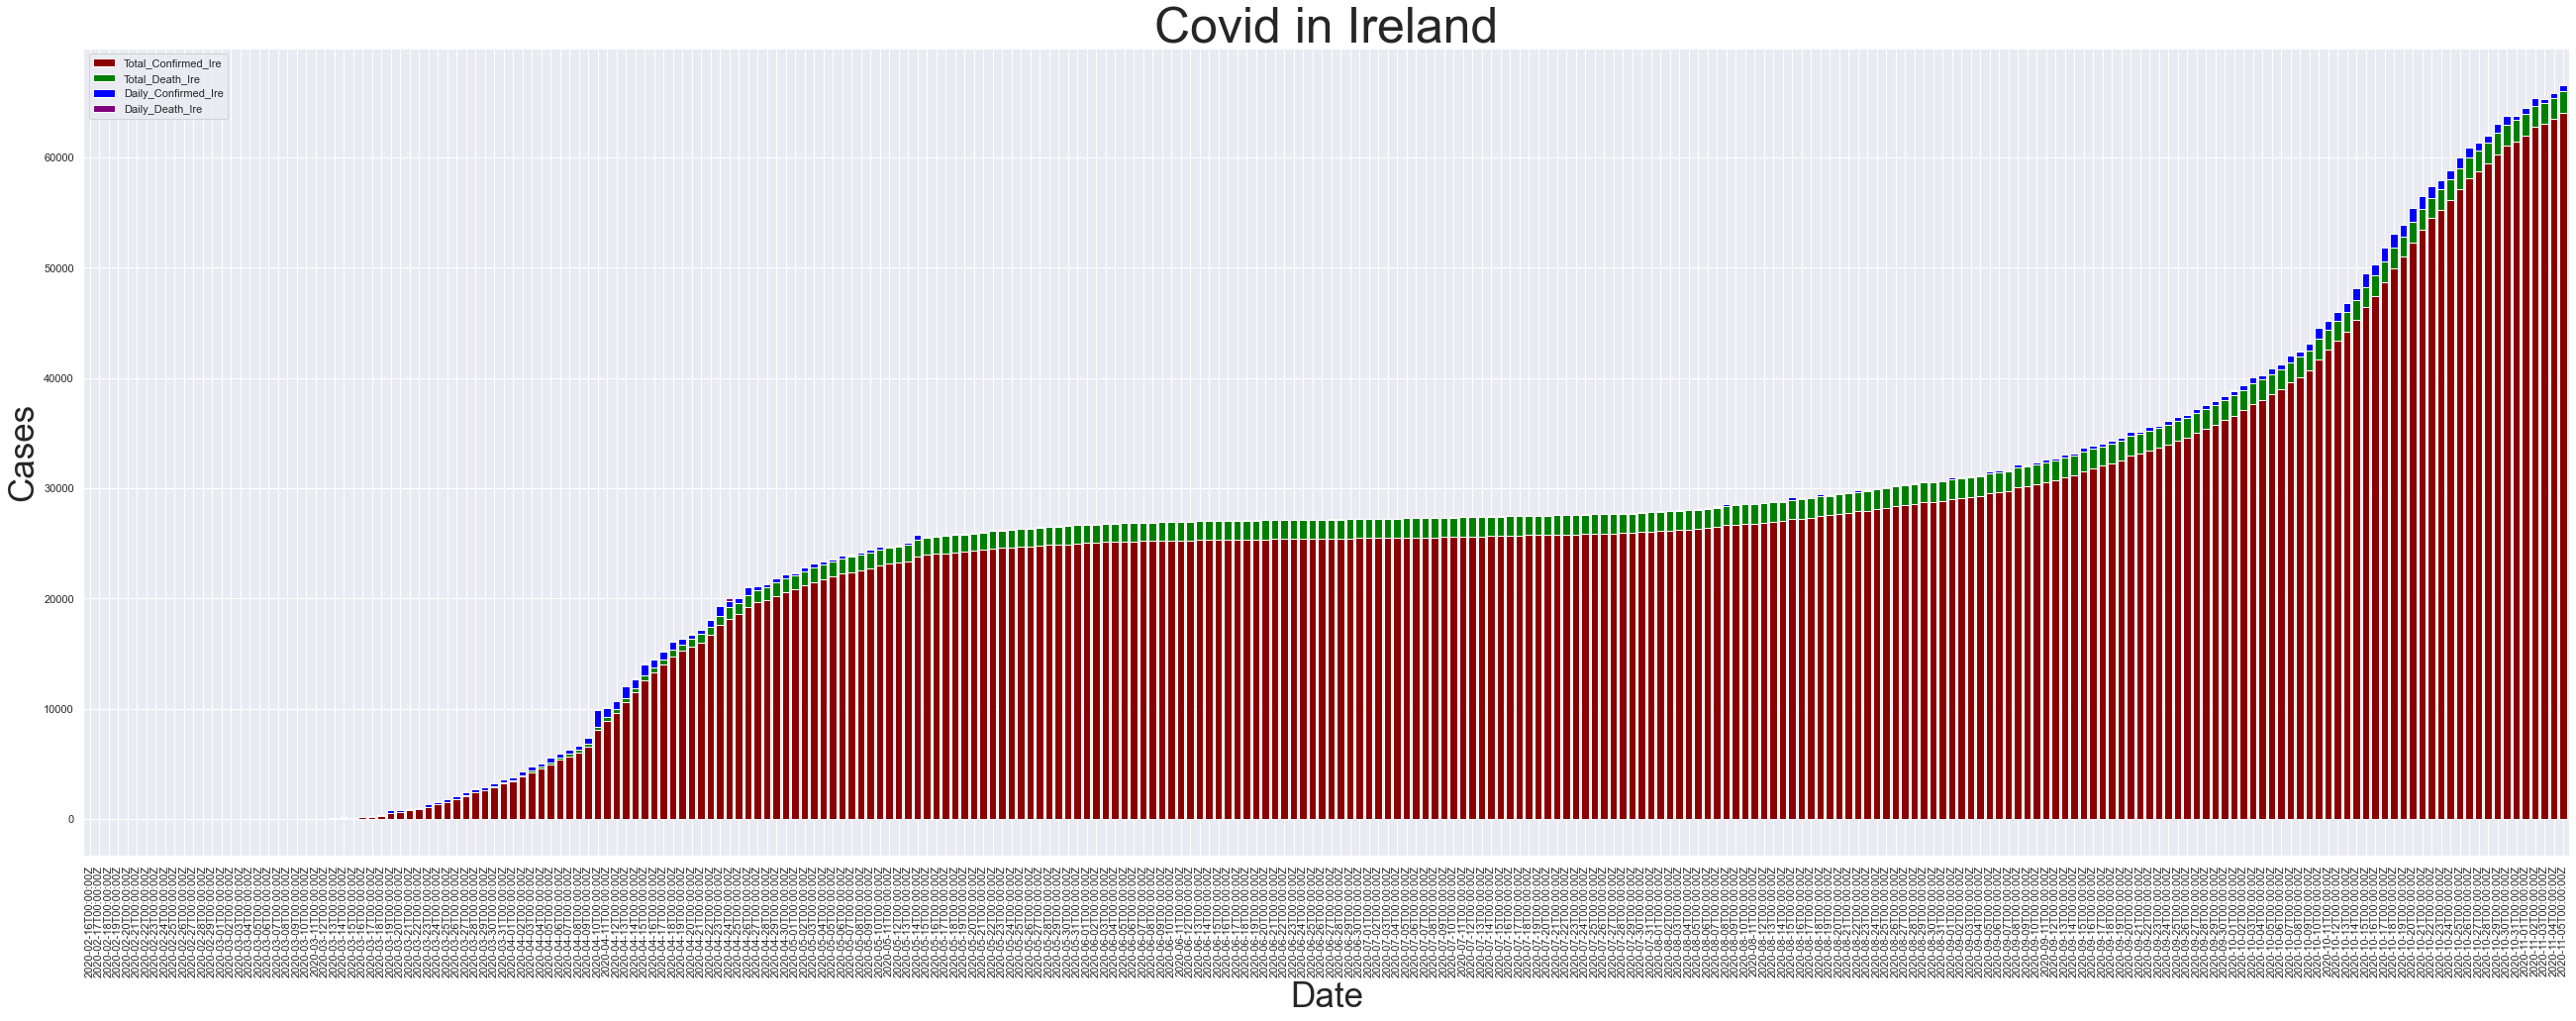

In [31]:
#Using seaborn to create a stacked bar chart that looks at all data relevant to Ireland 
#red = total confirmed cases, green = total deaths, blue = daily confirmed cases, purple = daily deaths
#size of graph needed to be adjusted to fit in dates and bars
sns.set()
IreData = data.plot(kind="bar", stacked=True, figsize=(45,15), width=0.8,
          color=["darkred","green","blue", "purple"],
          y=["Total_Confirmed_Ire", "Total_Death_Ire", "Daily_Confirmed_Ire", "Daily_Death_Ire"])

plt.ylabel("Cases", fontsize=35)
plt.xlabel("Date", fontsize=35)
plt.title("Covid in Ireland", fontsize=50)

> - The graph shows a steep increase in total cases at the beginning of the pandemic with a low amount of deaths.
> - After around 20 days, we see the start of the deaths showing up on the graph. This could be an indicator of how long people with severe cases of Covid-19 have it before it becomes fatal. 
> - The total deaths follow the same trend as the total number of cases.
> - We observe a long period when the total cases seems to have stayed at a constant, before a similar increase as seen in the beginning marking what we know as the "second wave".
> - The daily confirmed cases seem to appear mainly around the times of steep increase in total cases.

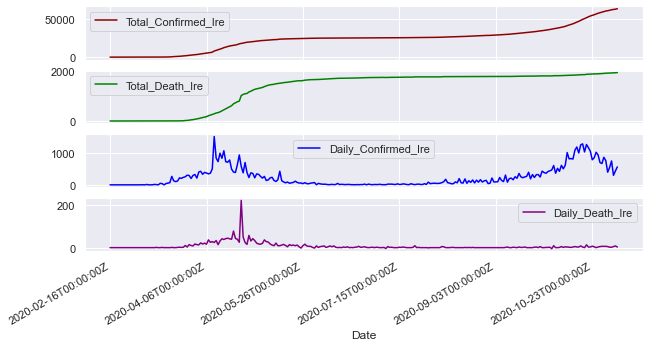

In [32]:
#seaborn is used here to make subplots for the data from Ireland 
sns.set()
data.plot(subplots=True, figsize=(10, 5), color = ["darkred","green","blue", "purple"], 
          y=["Total_Confirmed_Ire", "Total_Death_Ire", "Daily_Confirmed_Ire", "Daily_Death_Ire"]);

> - The subplots allow us to visualise the different layers individually.
> - An interesting observation we can make here is during the first wave of daily confirmed cases, we see a spike in the number of deaths, however in the second wave, this spike is non exisistent. This could mean our hospitals are better equipped to handle the pandemic or the way we are counting deaths due to the virus has changed. 

Text(0.5, 1.0, 'Covid in Norway')

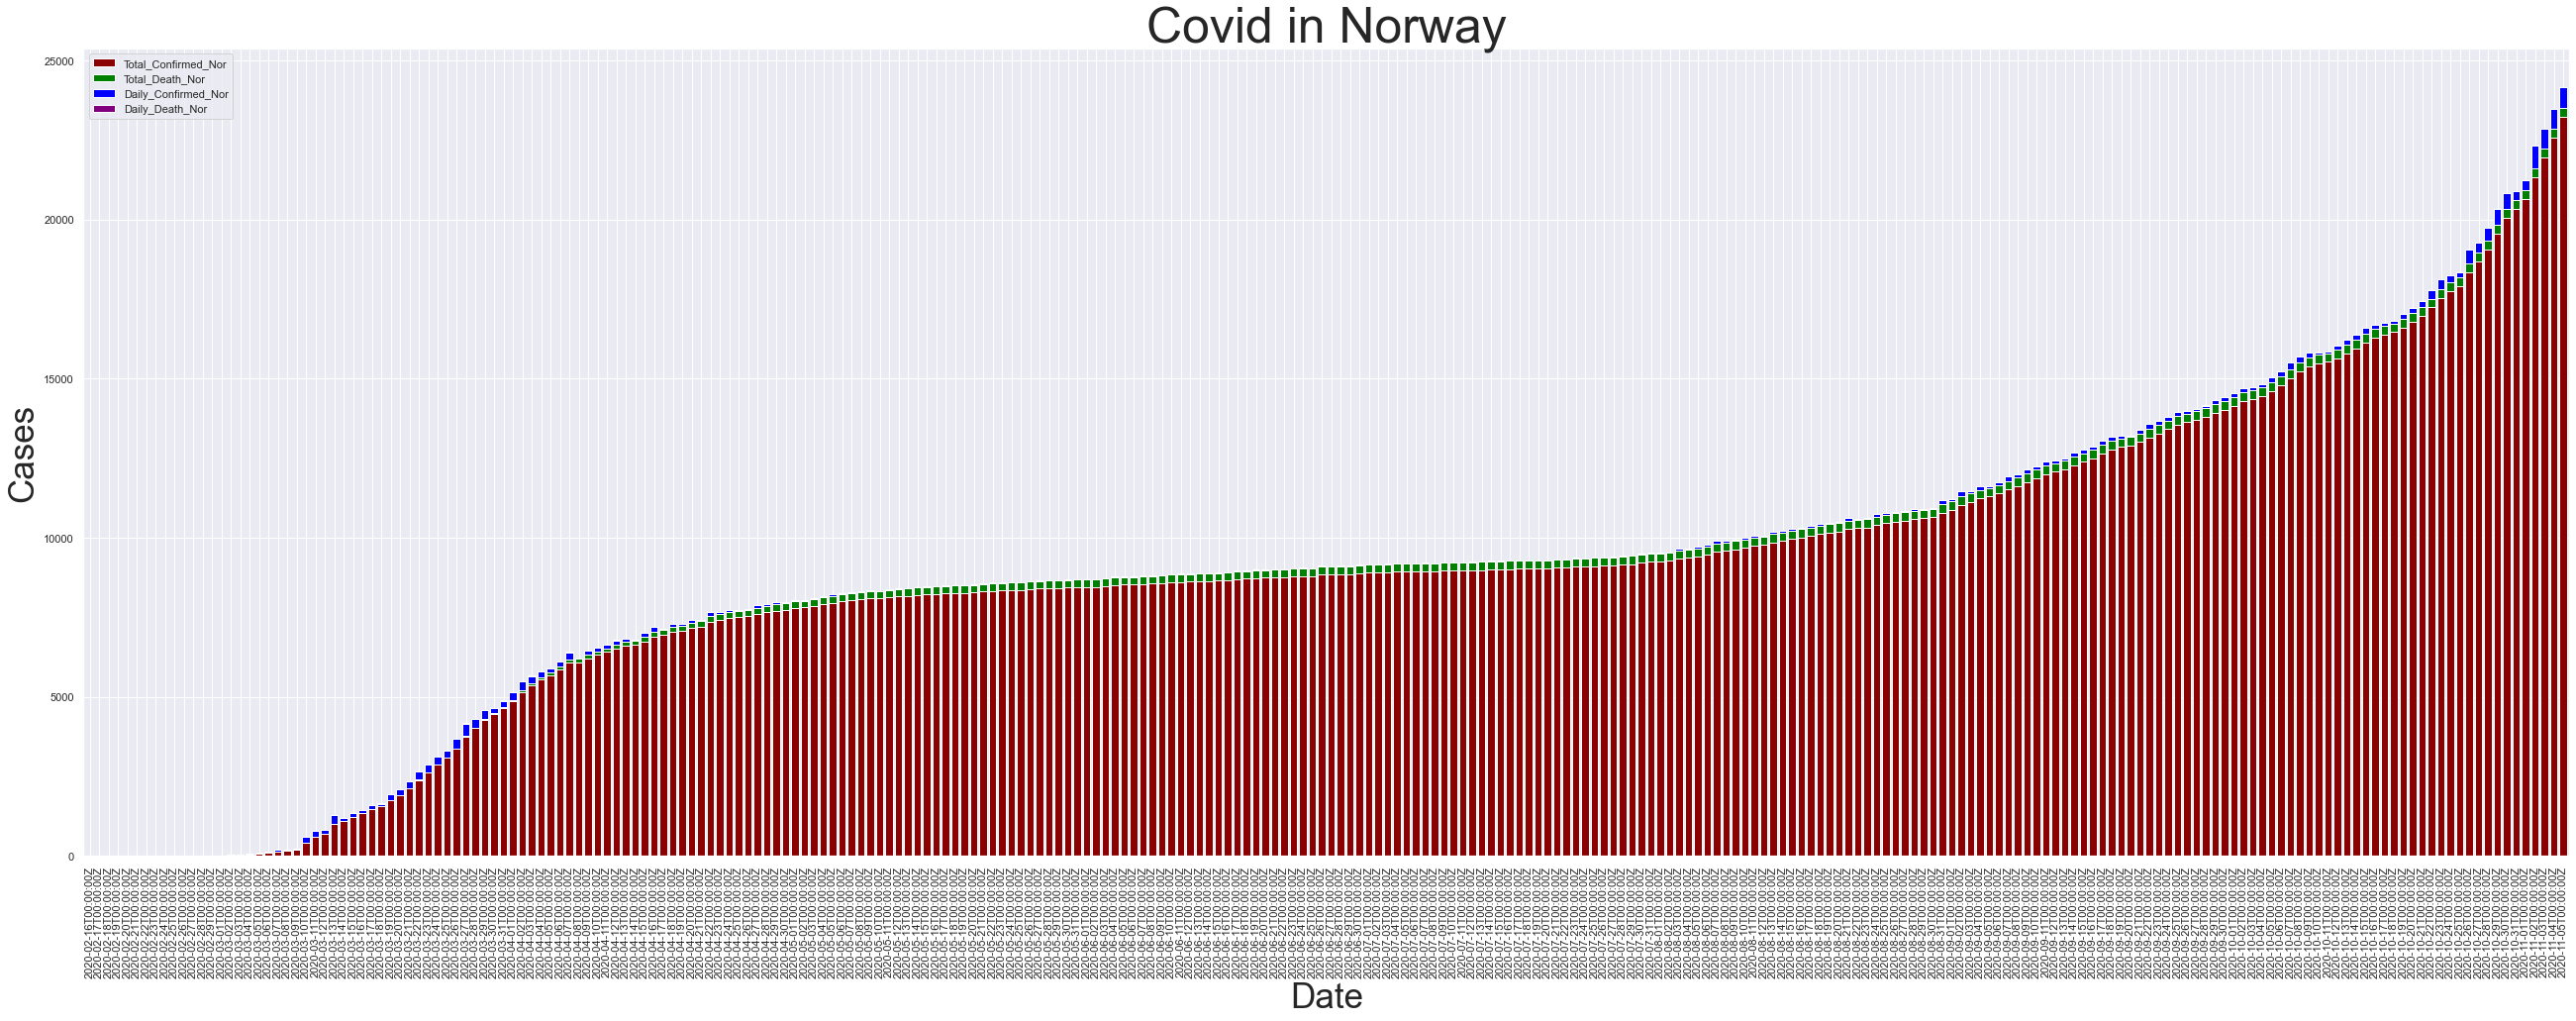

In [33]:
#Using seaborn to create a stacked bar chart that looks at all data relevant to Norway 
#red = total confirmed cases, green = total deaths, blue = daily confirmed cases, purple = daily deaths
#size of graph needed to be adjusted to fit in dates and bars
sns.set()
NorData = data.plot(kind="bar", stacked=True, figsize=(45,15), width=0.8,
          color=["darkred","green","blue", "purple"],
          y=["Total_Confirmed_Nor", "Total_Death_Nor", "Daily_Confirmed_Nor", "Daily_Death_Nor"])

plt.ylabel("Cases", fontsize=35)
plt.xlabel("Date", fontsize=35)
plt.title("Covid in Norway", fontsize=50)

> - Similar to Ireland, we see an exponential growth in total cases at the beginning of the pandemic, followed by a flattening of the curve. 
> - An observation to make here is it seems Norway are currently entering their second wave since their curve is yet to flatten. The rate of growth seems far more rapid than their first wave, which could mean Norway will see an increase for a while before they flatten

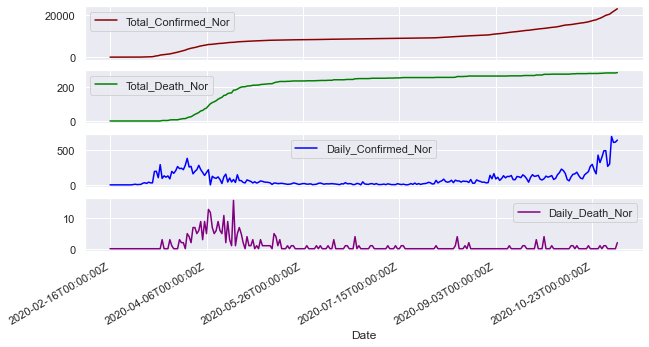

In [34]:
#seaborn is used here to make subplots for the data from Norway 
sns.set()
data.plot(subplots=True, figsize=(10, 5), color = ["darkred","green","blue", "purple"], 
          y=["Total_Confirmed_Nor", "Total_Death_Nor", "Daily_Confirmed_Nor", "Daily_Death_Nor"]);

> - This subplot shows us how Norway is currently facing a much larger wave than the first one. As we can see in the Daily confirmed Cases, the peak as already surpassed the 1st wave's peak and it doesn't seem to be flattening yet. 
> - Similar to Ireland, we see a lack of a spike of daily deaths during this wave despite there being a big increase in cases

Text(0, 0.5, 'Cases')

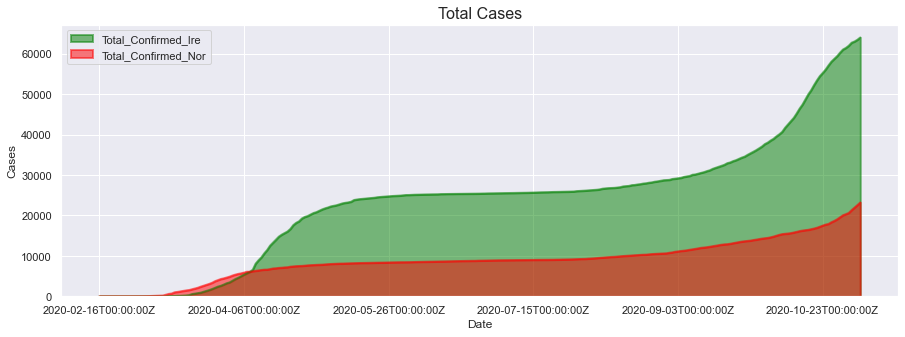

In [35]:
#creating a plot comparing the total number of cases in Ireland and Norway using .plot.area()
#green = Ireland, red = Norway
sns.set()
data.plot.area(figsize=(15,5),linewidth=2, stacked=False, y=["Total_Confirmed_Ire","Total_Confirmed_Nor"], color = ["green", "red"])
plt.title("Total Cases", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Cases", fontsize=12)

> - From this graph, it is quite clear that Norway has done a better job at controlling the virus.
> - Despite facing a surge in cases before Ireland, they managed to contain the virus better than we were able to.
> - By approximately **25,000** cases we were able to flatten the curve compared to the **7,000** (approx) by Norway

Text(0, 0.5, 'Cases')

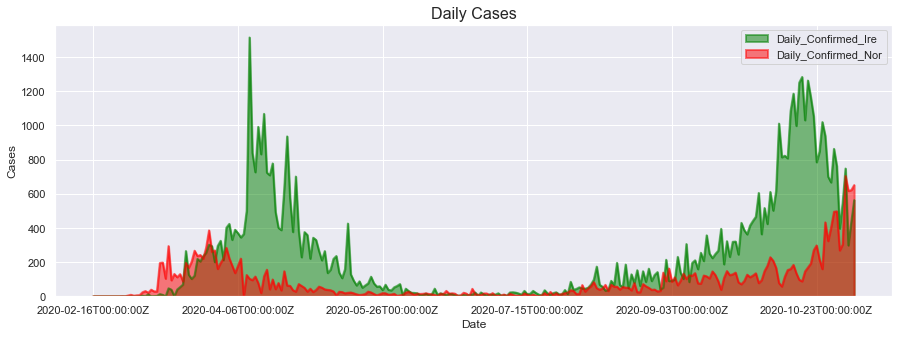

In [36]:
#creating a plot comparing the Daily number of cases in Ireland and Norway using .plot.area()
#green = Ireland, red = Norway
sns.set()
data.plot.area(figsize=(15,5),linewidth=2, stacked=False, y=["Daily_Confirmed_Ire","Daily_Confirmed_Nor"], color = ["green", "red"])
plt.title("Daily Cases", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Cases", fontsize=12)

> - Norway faced an initial spike which led to a peak of **400 cases**, from here the cases are on a decline until we get to the last couple of months where we see a steep increase with the peak reaching close to **800 cases**. This seems to be on the increase.
> - Ireland's peak was over **1500 cases** in a day. This reduced from May to August before we started facing another spike before Norway did. Our cases are on a declining trend and we didn't reach the peak number of cases that we faced in our first wave, indicating we are doing a better job now at handling the virus.
> - The time between the 2 waves for Norway is greater than the time it took for Ireland. This is another indicator of a better response by Norway. 

Text(0, 0.5, 'Cases')

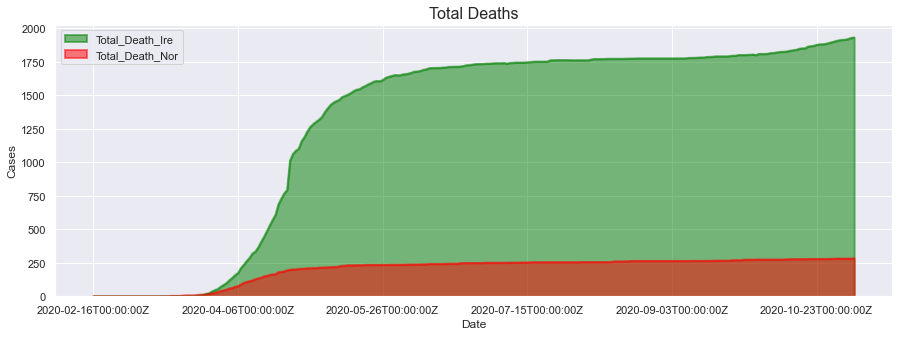

In [37]:
#creating a plot comparing the Total number of deaths in Ireland and Norway using .plot.area()
#green = Ireland, red = Norway
sns.set()
data.plot.area(figsize=(15,5),linewidth=2, stacked=False, y=["Total_Death_Ire","Total_Death_Nor"], color = ["green", "red"])
plt.title("Total Deaths", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Cases", fontsize=12)

> - The total number of deaths are compared on this graph. 
> - It is evident that Ireland faced a lot more fatalities at the hands of the virus than Norway has. 
> - The total number of deaths faced by Norway is just above 250, in comparison to the 1900+ by Ireland
> - Both countries are facing less death now and the increase in numbers is far less than before

Text(0, 0.5, 'Cases')

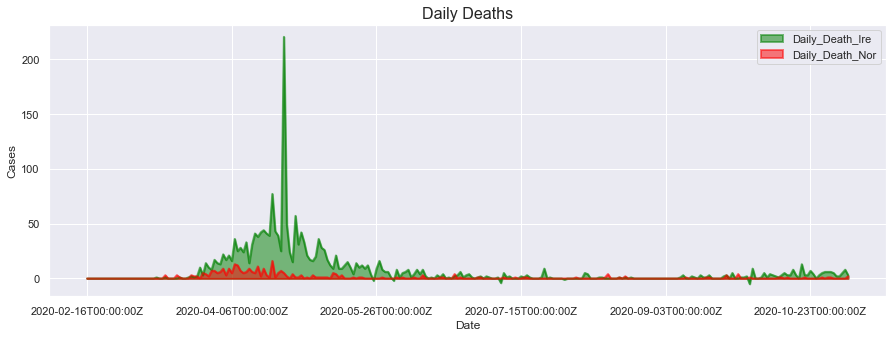

In [38]:
#creating a plot comparing the Daily number of deaths in Ireland and Norway using .plot.area()
#green = Ireland, red = Norway
sns.set()
data.plot.area(figsize=(15,5),linewidth=2, stacked=False, y=["Daily_Death_Ire","Daily_Death_Nor"], color = ["green", "red"])
plt.title("Daily Deaths", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Cases", fontsize=12)

> - Ireland faced one large spike leading to the death of approximately 230 people in a single day, but has since decreased.
> - Norway failed to face a large spike relative to Ireland in it's response to the virus, and there are no indications of an increase coming.

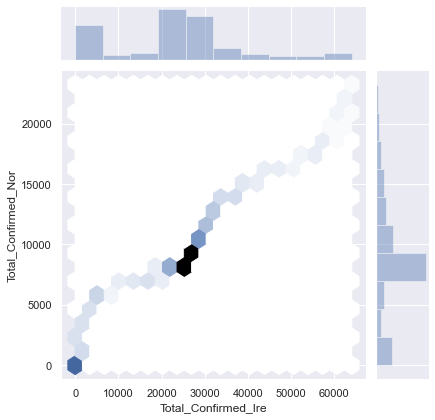

In [39]:
#creating a joint plot using seaborn, with a bins of 10
plot = sns.jointplot(data=data, x="Total_Confirmed_Ire", y="Total_Confirmed_Nor", kind="hex", marginal_kws=dict(bins=10))

> - This Joint Plot graphs the total confirmed cases for Ireland and Norway.
> - The Histograms allow us to see the frequency of a number occuring.
> - The areas that are highlighted in dark blue indicate where we have a correlation.
> - These hex shapes give us the range of numbers in which the cases remained stagnant or without huge growth.
> - For Norway, this point was between **8,000 to 10,000** cases, and for Ireland it was between **25,000 and 30,000** cases.

> This can be confirmed from the subplots below:

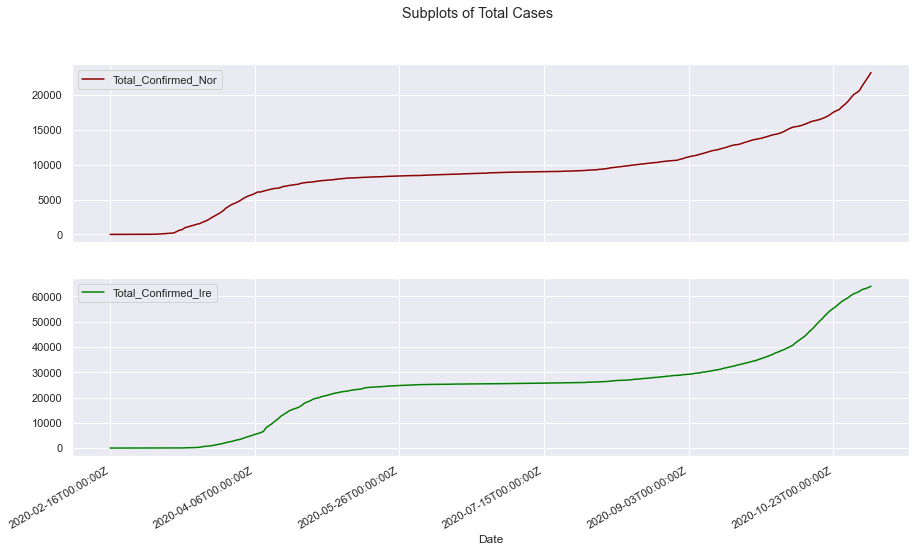

In [40]:
#creating subplots for total confirmed cases in both countries
data.plot(subplots=True, figsize=(15, 8), color = ["darkred","green"], 
          y=["Total_Confirmed_Nor", "Total_Confirmed_Ire"], title = "Subplots of Total Cases");

Created Subplots for Total Cases in Ireland and Norway
> - As we can see, the subplots confirm that the cases did infact remain stagnant and without growth in the ranges I gave, **8,000 - 10,000** for Norway and **25,000 to 30,000** for Ireland

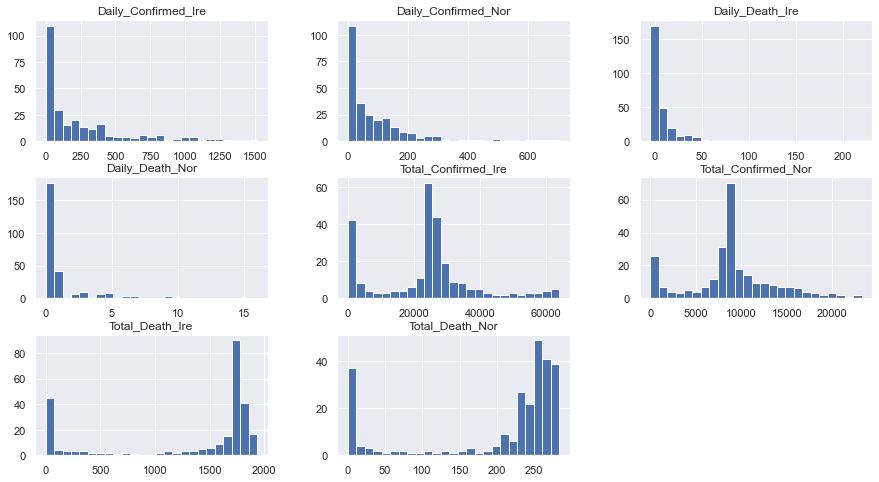

In [41]:
#creating subplots for all of the Histograms
d = data.hist(bins=25, figsize=(15,8))

Created Histograms for each column
> - **Daily Confirmed Cases in Ireland:** The bars on the histogram are decreasing, showing us that the on an average day, there were usually a relatively low to medium amount of cases being reported. The spikes of over **500 cases** are rare but do exist. 
> - **Daily Confirmed Cases in Norway:** Similar to Ireland, a relatively low number of cases were being reported on a daily basis, and spikes of over **300 cases** a day are rare. 
> - **Daily Deaths in Ireland:** Any cases where there are over **40 deaths** in Ireland is a rare occurance.
> - **Daily Deaths in Norway:** More than **5 deaths** in a day is a rare occurance in Norway.
> - **Total Confirmed Cases in Ireland:** As seen before, the cases remained stagnant or lacked great increase at about **25,000** cases in Ireland.
> - **Total Confirmed Cases in Norway:** As seen before, the cases remained stagnant or lacked a great increase at **8,000** cases in Norway.
> - **Total Deaths in Ireland:** The number of deaths remained stagnant and lacked growth at around **1,700 cases** in Ireland.
> - **Total Deaths in Norway:** The number of deaths remained stagnant and lacked growth at around **250 to 260** cases in Ireland.

## Summarising Insights
This analysis gave me a few great insights into Ireland and Norway's Covid-19 Response. Here is my summary of the analysis above:

### Total Confirmed Cases
With **40,817** more confirmed cases at the time of this analysis, it is clear that Ireland had a much tougher time at dealing with the pandemic. Despite confirming a case before Ireland in February, Norway's measures meant it was able to contain the virus far better than we were. So here are a few measures Norway took to contain the virus:
> - Norway enforced very strict social distancing measures.
> - They prioitised taking care of the elderly.
> - They put a strong emphasis on the need to avoid burdening the health system.
> - They enforced tight travel restrictions.

Interestingly, Norway never went into a full lockdown, as shops, pubs and restaurants remained open. As well as this, masks aren't mandatory to wear in public.

This led me to consider the factors which led to the number of confirmed cases we have. Initially, our healthcare system was under great stress and possibly lacked the resources that Norway had to flatten the curve, as seen in the **Covid in Ireland** graph. As well as this, a release from a **full** lockdown could have led to a greater influx of people not adhering to Social Distancing rules in public and private settings, which may have led to the second wave that we saw on the **Covid in Ireland** graph. 

However, as we saw on the **Covid in Norway** graph, it seems Norway is entering a second wave and this time the cases seem to be increasing at a steeper rate. 

### Daily Confirmed Cases
As seen in the **Daily Cases** graph, Norway started getting cases before we did in Ireland. They had a spike of 400 cases in March which can be see on the **Daily Cases** graph. 2 days later, on the 12th of March, Norway announced their national lockdown. Since the lockdown was announced, we can see that the cases have been on a decreasing level and don't reach the peak during the first wave of cases. 

On the 12th of March, Ireland saw its first set of restrictions being put in place, and the nation went into a full lockdown on the 27th of March. Unlike Norway, as seen in the **daily cases graph** and **sublplots** our cases kept increasing during the lockdown, hitting a peak of over 1,500 cases weeks after lockdown began. This may allude to the fact that our infrastructure wasn't as ready for the lockdown and for dealing with the virus as Norway was.

The **Daily Cases graph** and **joinntplot** also shows us that the daily cases remained stagnant in Norway for a longer period than they did in Ireland. 

### Total Deaths
The **table**, supported by the **Total Deaths** graph, clearly shows the vast amount of deaths Ireland has compared to Norway. There are over 1600 reported deaths in Ireland and the ratio of deaths to cases is **0.03:1** in Ireland, compared to the **0.01:1** in Norway. 

A big factor to this could once again be the health care system. It could either be a lack of resources in Ireland or perhaps Norwegian people are healthier and have less underlying conditions which is a big cause of death due to Covid-19. 

### Daily Deaths
We can clearly see on the graph mapping **Daily Deaths** in both countries that Ireland has one large spike that is unmatched in the past few months. This spike came towards the end of April. Apart from this one incident, the cases managed to stay under **50 deaths** consistently which can be seen in the **Histograms**. Despite a second wave, we haven't reached the number of deaths that we initially did. This could mean our response is improving in terms of handling patients with severe cases of the virus or the way we report cases could have changed. 

Norway doesn't have a spike in terms of deaths relative to Ireland. Within these dates, the **maximum number** it reached was 16 in one day which is quite low compared to Ireland.

### Concluding Remarks and Further Analysis
To conclude my analysis, I think it's quite clear that Norway has done an excellent job at containing the virus up until the last month or so. It seems as if they are entering another wave which is growing at a more rapid pace than the first wave and is yet to see signs of flattening. If their previous handling of the virus is any indication, they will be flatten their curve soon. However I could do some further analysis into this to see if I can make predictions as to when the cases in Norway will stop rising. 

One big positive we can take from Ireland's response is that the death rate daily is quite low compared to the inital wave. However, perhaps it was a lack of resources and planning that led to our response being weaker than Norways. The curve on our second wave is flattening as can be seen on the graph and it will be interesting to see if we can keep our cases stagnant for a longer duration this time. I could also look into the cases by counties in the future to see where the most cases are and represent the country as a heatmap. 

For some further analysis, I could look into the recovery figures to see which country has a larger percentage of people who recovered from the virus. As well as this, I could segment the ages of the people who got the virus and analyse them seperately. I could also compare the figures to outside factors such as weather, population density and other economic indicators to see if they have any correlation to having a larger number of cases.  